In [72]:
import os
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [73]:
sns.set(rc={'figure.figsize':(11, 4)})

In [2]:
os.chdir(r"C:\Users\Pohlmann\Documents\FGV\8º Semestre\OTCC/")

In [3]:
dirs = ['Data/','Data_Legitimate/']

In [4]:
dic = {}
for direc in dirs:
    print(direc)
    files = os.listdir(direc)
    dic[direc] = {}
    for file in files:
        cfile = pd.read_csv(direc+file, index_col=0, header=0, sep=',')
        cfile.rename(columns={cfile.columns[0]: file[:-4]}, inplace=True)
        dic[direc][file[:-4]] = cfile

Data/
Data_Legitimate/


In [22]:
prt = pd.concat(dic['Data/'], axis=1, ignore_index=False, sort=True)
lgt = pd.concat(dic['Data_Legitimate/'], axis=1, ignore_index=False, sort=True)

In [23]:
prt.columns = prt.columns.droplevel(0)
lgt.columns = lgt.columns.droplevel(0)

In [39]:
prt.describe().sort_values(by='mean', axis=1, ascending=False).columns[:10]

Index(['utorrentcom', 'thepiratebayorg', 'superflixnet', 'vizertv',
       'seuseriadocom', 'snaptubeappcomOUTLIER_MOSTLYOUTSIDEDOWNLOADS',
       'assistirseriadosnet', 'animesonlinecc', 'megafilmeshdplusorg',
       'maxseriestv'],
      dtype='object')

In [54]:
prt.index = pd.to_datetime(prt.index)
lgt.index = pd.to_datetime(lgt.index)

In [63]:
prt = prt.loc['2017-02-01':'2020-10-30']
lgt = lgt.loc['2017-02-01':]

In [67]:
prt.describe().sort_values(by='mean', axis=1, ascending=False)

,utorrentcom,superflixnet,thepiratebayorg,vizertv,seuseriadocom,assistirseriadosnet,animesonlinecc,snaptubeappcomOUTLIER_MOSTLYOUTSIDEDOWNLOADS,maxseriestv,megafilmeshdplusorg,...,rjseriesorg,gtugacom,oneflixhdnet,askflixnet,megaserieshdonline,redecanaisblog,filmeseriesonlinehdorg,overflixvip,filmeshdtop,tugastreamclub
count,1.368000e+03,1.368000e+03,1.368000e+03,1.368000e+03,1368.000000,1.368000e+03,1.368000e+03,1368.000000,1.368000e+03,1368.000000,...,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000
mean,1.422499e+06,1.245146e+06,1.175270e+06,4.769613e+05,459530.393422,4.541377e+05,4.484172e+05,443915.971580,3.297801e+05,317066.837454,...,3885.662383,3516.256336,2665.878348,2573.676678,1344.023833,1318.372030,712.804497,257.972132,247.113732,60.147268
std,1.311989e+05,8.300944e+05,3.520659e+05,3.408549e+05,65199.797832,3.218354e+05,7.779182e+05,143074.590429,5.561714e+05,225183.196952,...,11313.721851,12769.534074,9014.906934,5576.513461,4379.683066,9231.767413,3956.204397,1456.035906,1733.514742,224.277244
min,8.060442e+05,0.000000e+00,1.580593e+03,0.000000e+00,24024.944127,2.000000e-06,3.450000e-04,65215.720679,4.112000e+01,81088.450890,...,0.004513,0.000298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000240,0.004034,0.000000
25%,1.328407e+06,9.172623e+05,9.779898e+05,1.418891e+05,432347.716078,2.153035e+05,6.440000e-04,349609.555789,4.112000e+01,135833.004620,...,0.004513,0.000298,0.002576,0.000000,0.000000,0.000000,0.000000,0.000240,0.005167,0.000000
50%,1.413784e+06,1.250325e+06,1.267152e+06,5.354237e+05,448713.696171,3.570125e+05,6.440000e-04,456480.078611,4.112000e+01,234790.819783,...,0.004513,0.000298,0.002576,0.000000,0.000000,0.000000,0.000000,0.000240,0.005167,1.138207
75%,1.528657e+06,1.925716e+06,1.501495e+06,6.220241e+05,500654.948462,7.321472e+05,5.134453e+05,506943.188842,7.843650e+05,430222.851861,...,0.004513,0.000298,8.443601,0.000000,0.000000,0.000000,0.000000,0.000240,0.005167,13.110225
max,1.691182e+06,2.797214e+06,1.537225e+06,1.289074e+06,666599.645353,1.140551e+06,2.893356e+06,945275.207550,1.870553e+06,941901.150813,...,60147.882397,54477.931236,53963.623022,19488.919115,40196.252849,149339.058626,48954.705065,19856.124457,19717.938344,1540.744330


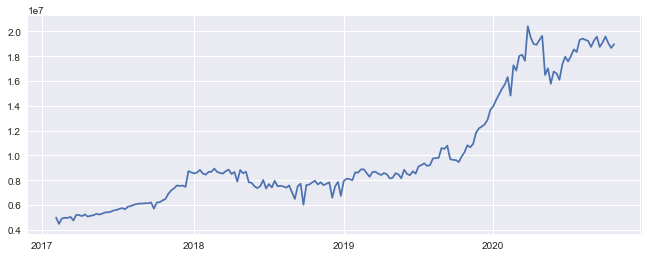

In [74]:
prt.asfreq('w').sum(axis=1).plot()

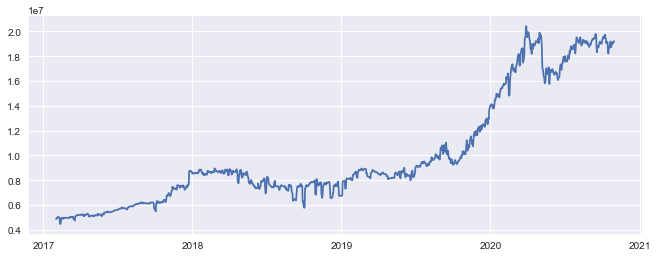

In [75]:
prt.sum(axis=1).plot()
# período diário introduz muita variabilidade, usar período semanal para ficar mais simples

In [66]:
lgt.describe().sort_values(by='mean', axis=1, ascending=False)

,netflixcom,globoplayglobocom,primevideocom,telecineplaycombr,crunchyrollcom,nowonlinecombr,vikicom,hbogocombr,lookecombr,hulucom,playpluscom,mubicom,oldflixcombr
count,1.369000e+03,1.369000e+03,1.369000e+03,1.369000e+03,1.369000e+03,1.369000e+03,1369.000000,1369.000000,1.369000e+03,1369.000000,1369.000000,1369.000000,1369.000000
mean,3.588332e+07,1.611941e+07,1.774042e+06,1.716750e+06,1.196773e+06,9.706536e+05,450331.631863,416318.724651,3.312325e+05,51415.686671,38689.873025,31171.762835,18429.508417
std,1.683163e+06,4.504879e+06,6.036334e+05,1.333981e+06,7.185432e+05,3.297178e+05,63570.663007,72781.790576,3.097796e+05,8764.848345,39657.913189,4355.316879,10141.472226
min,5.431268e+06,8.822731e+06,6.322595e+05,1.566342e+03,2.476668e+05,2.816799e+05,259363.988342,5862.510940,5.581662e+04,7748.439799,447.274600,10223.773021,9205.931829
25%,3.496587e+07,1.166358e+07,1.231690e+06,5.458741e+05,5.013023e+05,6.958844e+05,417823.218286,423584.079971,7.349789e+04,45012.638190,1329.020000,28120.288950,10959.243030
50%,3.605410e+07,1.722262e+07,1.717757e+06,1.321324e+06,7.916921e+05,8.859373e+05,444800.488311,431615.855736,1.794850e+05,53114.030656,1470.762567,29479.763358,15579.196223
75%,3.647190e+07,1.887552e+07,2.383533e+06,2.964409e+06,1.938306e+06,1.196756e+06,509237.990517,439852.056674,5.652467e+05,56732.413403,79836.801009,33812.164061,20589.918010
max,3.905315e+07,2.733926e+07,4.648665e+06,4.381903e+06,2.534630e+06,2.089467e+06,560040.816419,488592.922424,1.920085e+06,106390.730147,119666.773263,42210.173491,62818.529100


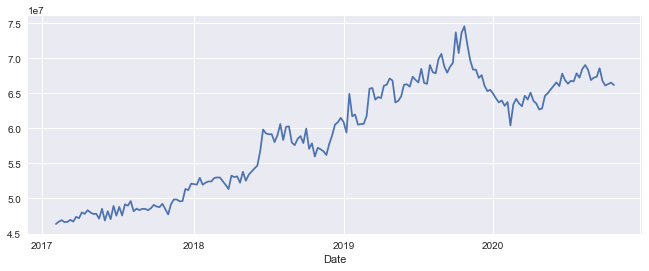

In [76]:
lgt.asfreq('w').sum(axis=1).plot()

In [91]:
totals = pd.DataFrame(prt.asfreq('w').sum(axis=1),columns=['Pirataria']).join(pd.DataFrame(lgt.asfreq('w').sum(axis=1),columns=['Legítimo']))

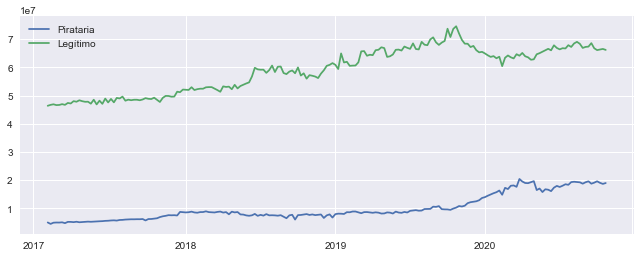

In [92]:
totals.plot()